# 03 Dimensionality and Clustering

This notebook begins the Week 3 task, building on the work completed in Weeks 1 and 2. We first repeat key preprocessing steps, apply Isolation Forest for baseline anomaly detection, and then extend the analysis using Principal Component Analysis (PCA) and Hierarchical Density-Based Spatial Clustering of Applications with Noise (HDBSCAN).

PCA is a dimensionality reduction technique that transforms the data into a lower-dimensional space, helping to highlight patterns and structure while retaining key variance.
HDBSCAN is an advanced clustering method that identifies groups of similar points and isolates noise without needing to predefine the number of clusters.

Together, these techniques allow us to explore latent structure in the data and detect subtle anomalies beyond what basic isolation methods can reveal.



### **Step 1 - Import Required Libraries**

We begin by importing the necessary libraries for data handling, visualisation, scaling, and anomaly detection, as introduced in Weeks 1 and 2. These provide the core tools for preparing the data, plotting results, applying scaling, and running Isolation Forest as our baseline model.

For Week 3, we additionally import:

* `PCA` (from `sklearn.decomposition`) - used to reduce the dimensionality of the dataset, allowing us to uncover latent patterns and simplify the data structure while retaining key variance.
* `hdbscan`- a powerful clustering algorithm that groups similar data points and identifies noise without needing a predefined number of clusters, helping us detect more complex structures and subtle anomalies.

These additions extend our toolkit to move beyond basic anomaly detection and explore the underlying structure of the data.




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
import hdbscan

---

### **Step 2  - Codes Rrecap**

As covered in previous weeks, we repeat the following steps: defining the file path, loading the dataset, normalising the value column using Min-Max scaling, applying Isolation Forest for anomaly detection, converting the anomaly output, and visualising detected anomalies by overlaying them on the original signal.



For full code explanations, please refer to Week 2.


In [ ]:
file_path = 'data/InternalBleeding14.csv'
df = pd.read_csv(file_path, sep=",")

print("\nFirst 10 rows of dataset:")
display(df.head(10))


First 10 rows of dataset:


,timestamp,value
0,0,97.46170
1,1,97.38159
2,2,97.18323
3,3,96.96197
4,4,96.67206
5,5,96.55380
6,6,96.62247
7,7,96.48132
8,8,96.52329
9,9,96.79413


In [ ]:
scaler = MinMaxScaler()
df['value_scaled'] = scaler.fit_transform(df[['value']])

iso = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
df['anomaly_score'] = iso.fit_predict(df[['value_scaled']])
df['anomaly'] = (df['anomaly_score'] == -1).astype(int)

print("\nSample of dataset with anomaly predictions:")
display(df.head(10))

print("\nAnomaly counts:")
display(df['anomaly'].value_counts())


Sample of dataset with anomaly predictions:


,timestamp,value,value_scaled,anomaly_score,anomaly
0,0,97.46170,0.733364,1,0
1,1,97.38159,0.731460,1,0
2,2,97.18323,0.726746,1,0
3,3,96.96197,0.721487,1,0
4,4,96.67206,0.714597,1,0
5,5,96.55380,0.711786,1,0
6,6,96.62247,0.713418,1,0
7,7,96.48132,0.710064,1,0
8,8,96.52329,0.711061,1,0
9,9,96.79413,0.717498,1,0



Anomaly counts:


,count
anomaly,
0,7127
1,374


---

### **Step 3  - Apply PCA (Reduce to 1 Component for Clustering)**


We apply Principal Component Analysis (PCA) to reduce the scaled signal to a single component.  
This simplifies the data while preserving key variance, making it suitable for clustering.


In [ ]:
pca = PCA(n_components=1)
df['pca_component'] = pca.fit_transform(df[['value_scaled']])

print("\nSample of PCA-transformed data:")
display(df.head(10))


Sample of PCA-transformed data:


,timestamp,value,value_scaled,pca_component,cluster,anomaly_score,anomaly
0,0,97.46170,0.733364,0.300088,1,1,0
1,1,97.38159,0.731460,0.298184,1,1,0
2,2,97.18323,0.726746,0.293470,1,1,0
3,3,96.96197,0.721487,0.288211,1,1,0
4,4,96.67206,0.714597,0.281321,1,1,0
5,5,96.55380,0.711786,0.278510,1,1,0
6,6,96.62247,0.713418,0.280142,1,1,0
7,7,96.48132,0.710064,0.276788,1,1,0
8,8,96.52329,0.711061,0.277785,1,1,0
9,9,96.79413,0.717498,0.284222,1,1,0



##### **Observations from Sample of PCA-transformed dataset:**

- `timestamp`: Index position of each observation.
- `value`: Original sensor reading.
- `value_scaled`: Normalised version of `value` between 0 and 1.
- `pca_component`: Result of applying Principal Component Analysis (PCA) to reduce dimensionality; represents the data in a compressed feature space while preserving variance.
- `cluster`: Cluster label assigned by HDBSCAN (retained for full pipeline consistency).
- `anomaly_score`: Raw prediction from Isolation Forest.
- `anomaly`: Final binary label where `0` means normal, `1` indicates anomaly.

PCA simplifies the data structure for easier clustering by converting multiple correlated features into an uncorrelated principal component while retaining essential variance patterns in the signal.


---

### **Step 4 - Apply HDBSCAN**

We apply HDBSCAN clustering to the PCA-transformed data.  
HDBSCAN identifies clusters of varying density and shape, and automatically labels noise points, allowing us to detect natural groupings without predefining the number of clusters.  
We then display a sample of the cluster assignments and show the count of points in each cluster for verification.




In [ ]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=50)
df['cluster'] = clusterer.fit_predict(df[['pca_component']])

print("\nSample of data with cluster assignments:")
display(df.head(10))

print("\nCluster counts:")
display(df['cluster'].value_counts())


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



Sample of data with cluster assignments:


,timestamp,value,value_scaled,pca_component,cluster,anomaly_score,anomaly
0,0,97.46170,0.733364,0.300088,1,1,0
1,1,97.38159,0.731460,0.298184,1,1,0
2,2,97.18323,0.726746,0.293470,1,1,0
3,3,96.96197,0.721487,0.288211,1,1,0
4,4,96.67206,0.714597,0.281321,1,1,0
5,5,96.55380,0.711786,0.278510,1,1,0
6,6,96.62247,0.713418,0.280142,1,1,0
7,7,96.48132,0.710064,0.276788,1,1,0
8,8,96.52329,0.711061,0.277785,1,1,0
9,9,96.79413,0.717498,0.284222,1,1,0



Cluster counts:


,count
cluster,
1,7173
-1,229
0,99


##### **Observations from HDBSCAN Cluster Assignments and Cluster distribution**

- **HDBSCAN Cluster Assignments**

 - `timestamp`: Position index for the time series.
 - `value`: Original observed sensor value.
 - `value_scaled`: Normalised sensor value (scaled between 0 and 1).
 - `pca_component`: Principal component output after dimensionality reduction.
 - `cluster`: Assigned cluster label generated by HDBSCAN.
   - `1`, `0`: Represent stable clusters.
   - `-1`: Represents noise points or data that HDBSCAN could not confidently assign to any cluster.
 - `anomaly_score` & `anomaly`: Carried forward from previous Isolation Forest step for consistency.-

- **Cluster distribution**
 - Cluster `1`: 7173 samples (main normal structure).
 - Cluster `0`: 99 samples (possible alternative minor behaviour).
 - Cluster `-1`: 229 noise points (potential irregular behaviour or weak structure).

Clustering allows grouping of similar behaviour patterns and provides an unsupervised structure to support anomaly interpretation and model validation.


---

### **Step 5 - Visualise Cluster Assignments**

We plot the PCA component over time and colour each point by its HDBSCAN cluster assignment.  
This allows us to see how the identified clusters and noise points are distributed across the time series.


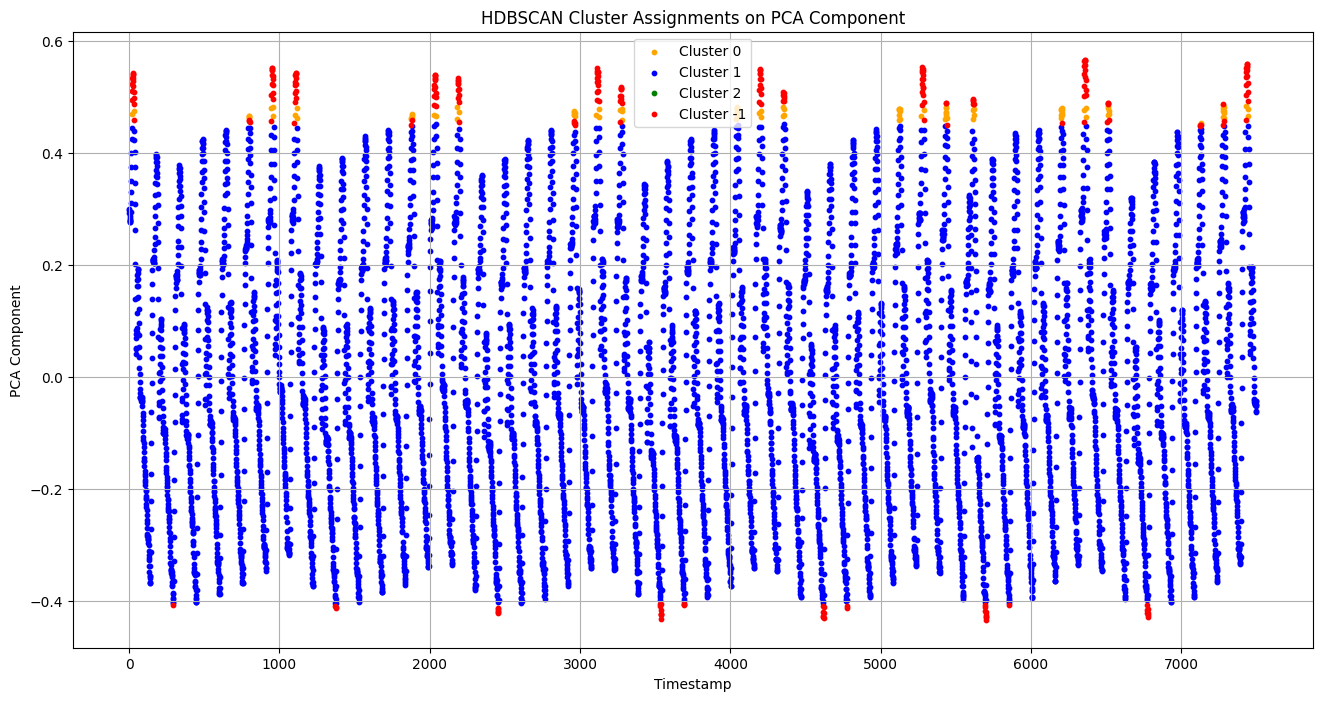

In [ ]:
plt.figure(figsize=(16, 8))
colors = {0: 'orange', 1: 'blue', 2: 'green', -1: 'red'}
for cluster, color in colors.items():
    subset = df[df['cluster'] == cluster]
    plt.scatter(subset['timestamp'], subset['pca_component'],
                c=color, label=f'Cluster {cluster}', s=10)
plt.title('HDBSCAN Cluster Assignments on PCA Component')
plt.xlabel('Timestamp')
plt.ylabel('PCA Component')
plt.legend()
plt.grid()
plt.show()


#### **Observations from HDBSCAN Cluster Assignments - PCA Projection Plot**

This scatter plot visualises the HDBSCAN cluster assignments after dimensionality reduction with PCA.

- **X-axis (Timestamp):** The sequence index of the time series data.
- **Y-axis (PCA Component):** The reduced representation of the normalised signal using Principal Component Analysis (PCA).
- **Coloured markers:**
  - **Cluster 1 (blue):** The dominant stable pattern across most of the time series.
  - **Cluster 0 (orange):** A smaller sub-pattern possibly reflecting moderate variation.
  - **Cluster 2 (green):** Not present in this dataset — plotted for completeness.
  - **Noise cluster -1 (red):** Points which could not be assigned to any stable cluster, likely representing irregular behaviour, minor local deviations, or weak structures.

**Interpretation:**
- The majority of points are assigned to Cluster 1, indicating highly consistent normal behaviour.
- The noise points (`-1`) suggest areas of the time series where data deviates from dominant structures but not necessarily strong anomalies.
- The projection confirms that after PCA transformation, HDBSCAN successfully separates stable signal dynamics from minor irregularities.
